<a href="https://colab.research.google.com/github/SnehalMalhotra/first_project/blob/master/notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
drive_link="https://drive.google.com/drive/folders/1Lr-HkNFTfpb8_UXwt-X-dWx8uU95lgRC?usp=sharing"
drive_link

'https://drive.google.com/drive/folders/1Lr-HkNFTfpb8_UXwt-X-dWx8uU95lgRC?usp=sharing'

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [5]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snehalmalhotra","key":"2162662b2f4925f79c18aa6b2e318aef"}'}

In [7]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [8]:
!kaggle datasets download -d snehalmalhotra/food-items

100% 1.63G/1.63G [00:26<00:00, 78.2MB/s]
100% 1.63G/1.63G [00:26<00:00, 65.1MB/s]


In [9]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/poutine/1028984.jpg  
  inflating: images/poutine/102911.jpg  
  inflating: images/poutine/1036670.jpg  
  inflating: images/poutine/1036842.jpg  
  inflating: images/poutine/1040500.jpg  
  inflating: images/poutine/1044856.jpg  
  inflating: images/poutine/1045400.jpg  
  inflating: images/poutine/1045905.jpg  
  inflating: images/poutine/1051467.jpg  
  inflating: images/poutine/1053328.jpg  
  inflating: images/poutine/105398.jpg  
  inflating: images/poutine/106693.jpg  
  inflating: images/poutine/10671.jpg  
  inflating: images/poutine/1069917.jpg  
  inflating: images/poutine/1070867.jpg  
  inflating: images/poutine/1080374.jpg  
  inflating: images/poutine/1080385.jpg  
  inflating: images/poutine/1081120.jpg  
  inflating: images/poutine/1084918.jpg  
  inflating: images/poutine/1088275.jpg  
  inflating: images/poutine/1092714.jpg  
  inflating: images/poutine/1095420.jpg  
  inflating: images/poutine/10

In [10]:
predictor = load_learner("/content/drive/My Drive/Geeksman_AISquad_Project1_SNEHAL")

In [11]:
a=os.listdir('images')
a

['shrimp_and_grits',
 'caprese_salad',
 'filet_mignon',
 'beef_carpaccio',
 'poutine',
 'macarons',
 'cup_cakes',
 'pancakes',
 'creme_brulee',
 'caesar_salad',
 'french_fries',
 'waffles',
 'garlic_bread',
 'cannoli',
 'nachos',
 'hamburger',
 'baby_back_ribs',
 'pad_thai',
 'ramen',
 'spring_rolls',
 'escargots']

In [14]:
os.mkdir("/content/test")

In [15]:
for folders in a:
  test_images=os.listdir("images/"+folders)
  for i in range(100):
    shutil.copy("images/"+folders+"/"+test_images[i],"test/"+test_images[i])

In [17]:
all_test_images=os.listdir("test")
all_test_images

['2109882.jpg',
 '3107031.jpg',
 '2042971.jpg',
 '2875062.jpg',
 '2874813.jpg',
 '1697975.jpg',
 '3194887.jpg',
 '3347698.jpg',
 '1424651.jpg',
 '2745310.jpg',
 '2630804.jpg',
 '1459775.jpg',
 '1013966.jpg',
 '501803.jpg',
 '598036.jpg',
 '3708596.jpg',
 '1404212.jpg',
 '1196530.jpg',
 '3669819.jpg',
 '1881854.jpg',
 '1627640.jpg',
 '3307133.jpg',
 '315876.jpg',
 '1561591.jpg',
 '766885.jpg',
 '347521.jpg',
 '1881550.jpg',
 '2607715.jpg',
 '769805.jpg',
 '555931.jpg',
 '2482286.jpg',
 '3538923.jpg',
 '3322722.jpg',
 '1364391.jpg',
 '132717.jpg',
 '1671170.jpg',
 '2027383.jpg',
 '105859.jpg',
 '770054.jpg',
 '2720480.jpg',
 '3681407.jpg',
 '183313.jpg',
 '3363521.jpg',
 '1304195.jpg',
 '697601.jpg',
 '2626090.jpg',
 '336811.jpg',
 '30086.jpg',
 '286055.jpg',
 '144601.jpg',
 '2759624.jpg',
 '3491832.jpg',
 '3658201.jpg',
 '2894735.jpg',
 '450238.jpg',
 '1938362.jpg',
 '3460790.jpg',
 '2554579.jpg',
 '66445.jpg',
 '2607919.jpg',
 '3096265.jpg',
 '2622458.jpg',
 '2885926.jpg',
 '1552922.jp

In [18]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

cup_cakes


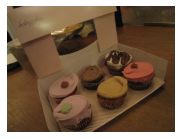

In [20]:
idx=809
print(my_predictor("test/"+all_test_images[idx]))
img = open_image("test/"+all_test_images[idx])
img.show()

In [21]:
import cv2
test_files=os.listdir("test")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_TRIPLEX
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [33]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [23]:
!pip install -U kora
from kora.drive import upload_public


In [31]:
url = upload_public('final_output.mp4')

RedirectMissingLocation: ignored